There will be some Python code inserted in this document to show you graphs. You can either ignore the code or dive into the details if you want.

In [1]:
from matplotlib.pyplot import *
%matplotlib inline
from scipy.optimize import leastsq
from scipy.constants import N_A
#my module to generate phase diagrams
from colloids import phase

# How to make a colloid+polymer phase diagram

Here we follow Fleer, G. J. & Tuinier, R. [Analytical phase diagrams for colloids and non-adsorbing polymer.](http://www.sciencedirect.com/science/article/pii/S0001868608001127) Adv. Colloid Interface Sci. 143, 1–47 (2008).

Unless indicated otherwise all quantities are dimensionless, with the Kuhn length $\ell$ as the yardstick for all lengths, and $kT$ for the energy. For example the insersion work $\Pi v$ in in unit of $kT$, and the radius of gyration $R$, the depletion thickness $\delta$ and the colloid radius $a$ are all in units $\ell$.

## Polymer physics

### Radius of gyration

The Kuhn length is the length over which the polymer coil can be considered random. In a good solvent, the Flory scaling can be written as an equality

$$R=\ell N^{3/5}$$

Here $N$ is not the number of monomers, but the number of Kuhn lengths you would have in the completely stretched polymer. However we know that $N$ is proportional to the number of monomers and thus to the molecular weight.

I gathered from the literature molecular weights and corresponding radii of gyration for the same polymer (Polystyrene, 104.1 g/mol of repeating unit) in the same solvent mixture (PMMA density matching mixture of cis-decalin and cyclohexyl bromide). The temperature is not often given, but must be "room temperature", thus close to our 25°C as in our case. Anyway, the temperature dependence of $R$ is small.

122.356366728


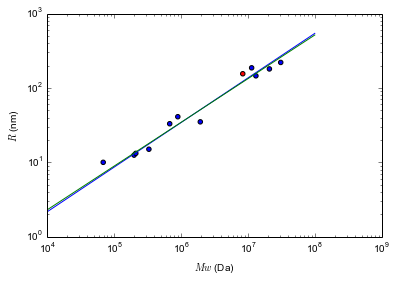

In [2]:
Mws = np.array([69.2e3, 2e5, 212.4e3, 333e3, 681e3, 900e3, 1.95e6, 11.4e6, 13.2e6, 21e6, 31e6])
Rgs = np.array([10.0, 12.5, 0.02*660, 15, 33.0, 41, 35, 1330*0.14, 145.4, 180, 220])
scatter(Mws, Rgs)
xscale('log')
yscale('log')
xlabel(r'$Mw$ (Da)')
ylabel(r'$R$ (nm)')
#Flory exponent
a = np.exp(leastsq(
    lambda p, x, y: p[0] + 3/5.*x-y, 
    [1], 
    args=(np.log(Mws), np.log(Rgs))
    )[0][0])
X = 10**np.arange(4,9)
plot(X, a*X**(3/5.), label='Flory exponent')
#Renormalisation group exponent
b = np.exp(leastsq(
    lambda p, x, y: p[0] + 0.588*x-y, 
    [1], 
    args=(np.log(Mws), np.log(Rgs))
    )[0][0])
plot(X, b*X**0.588, label='RG exponent')

scatter(8.4e6, 155, c='r')
print a * 8.4e6**(3/5.)

I can fit a flory scaling through the points and obtain the radius of gyration for ourmolecular weight ($Mw = 8.4$ MDa $= 8.4$ g/mol): $R=122$ nm.

### Overlap concentration

The overlap concentration is defined as

$$C^* = \frac{N}{V_\mathrm{coil}} = \frac{3N}{4\pi R^3}$$

The total weight of a coil of polymer is $Mw/\mathcal{N}_A$, where $\mathcal{N}_A$ is the Avogadro number, so the mass overlap concentration is

$$C^*w = \frac{3Mw}{4\pi R^3\mathcal{N}_A}$$

Knowing the density of the solvent $d=1.24$ g/ml we can obtain the weight per weight overlap concentration

$$C^*w/w = \frac{3Mw}{4\pi R^3\mathcal{N}_A d}$$

In [3]:
(3 * 8.4e6)/(4 * np.pi * (122e-9)**3 * N_A * 1.24e6) #in (m, g, mol) units

0.0014788991487600703

Thus $C^*w/w\approx 1.48$ mg/g. Here, our polymer weight fractions are between 0.1 mg/g and is 3 mg/g, so we cross from dilute regime to semidilute regime. Let us first solve the diagram as if the polymers are dilute and refine afterward.

## Theoretical phase diagram (dilute)

### Free volume theory

We consider a system where two phases of different colloid and polymer concentrations are at equilibrium with each other and with an external reservoir containing only the polymer solution. The chemical potential of the polymer in the system is determined by its volume fraction $\phi$ in the reservoir. This is also the volume fraction in the free volume $V_\mathrm{free}$ available to the polymers. However the overall internal volume fraction $\Phi = N_P V_\mathrm{coil}/V$ is lower because $V_\mathrm{free} < V$. More precisely:

$$\Phi_X = \alpha_X \phi$$

where $X$ is the phase, either gas (G), liquid (L) or solid (S). When the phase is dilute in colloids 

$$V_\mathrm{free} = V - N_C * \frac{4\pi}{3}(a+\delta)^3$$

with $\delta$ the depletion layer thickness and $a$ the colloid radius. Thus we can write in terms of colloid volume fraction $\varphi$:

$$\alpha(\varphi, \delta, a) = 1 - \varphi\left(1+\frac{\delta}{a}\right)^3$$.

In the following we will use a more complete expression for $\alpha$, valid for all colloid volume fraction and depending only on $q=\delta/a$. See the original paper.

To construct the phase diagram, we need to know the ratio $q=\delta/a$ between the depletion layer thickness $\delta$ and the colloid radius $a$.

Since the polymer is in dilute regime, we can consider that $\delta$ is constant and thus $q$ is constant. $q$ is related to the real size ratio $q_R=R/a$ via $q\approx 0.9 q_R^{0.9}$. Here $q_R\approx 122/1400 \approx 0.087$.

In [4]:
qR = 122/1400.
q = phase.qR2q(qR)
print 'qR = %0.3f, q = %0.3f'%(qR, q)

qR = 0.087, q = 0.091


In this semi-open system, the relevant thermodynamic characteristic function is the grand potential $\Omega(T,V,N_C, \mu_P)$ where $\mu_P$ is the polymer chemical potential. We write $\Omega = \Omega^0 + \Omega^P$ where $\Omega^0 = F^0$ is the free energy of the hard sphere system without polymer and $\Omega^P$ is the polymer contribution. It is convinient to have $\omega = \Omega v/V$ with $v=4\pi a^3/3$ the volume of a colloid. Taking into account the solvent, the polymer contribution $\omega^P$ can be related to the osmotic pressure in the reservoir $\Pi$:
$$\omega^P = -\int_{-\infty}^{\mu_P}\alpha d\Pi v$$

Since here $\alpha$ do not depends on $\mu_P$ we have $\omega^P = -\alpha \Pi v$. We see that $\Pi v$ is a natural parameter. It is the osmotic work to insert a particle (without the depletion layer) into the polymer solution.

From this and the expression of $\alpha$, one can derive analytical expressions for the polymer contribution to the chemical potention of the colloids $\mu_C^P$ and to the pressure $(pv)^P$. Hard sphere contributions are obtained from Carnahan-Starling equation of state. 

We know have expressons for $\mu_C(\varphi,\Pi v, q)$ and $pv(\varphi,\Pi v, q)$ where $q$ is a constant parameter.

### Phase diagram in $(\varphi, \Pi v)$ space

At the critical point the first and second derivatives of $pv$ with respect to $\varphi$ are zero. This sets a system of two equations with two unknowns $\varphi^{cp}$ and $\Pi^{cp}v$ that we solve numerically.

In [5]:
fc, pivc = phase.CarnahanStarling().critical_point(q)
print 'At critical point colloid volume fraction is %0.3f and osmotic insertion work is %0.3f kT'%(phase.f2vf(fc), pivc)

At critical point colloid volume fraction is 0.585 and osmotic insertion work is 313.915 kT


Spinodal are calculated from the condition 
$$\frac{dpv}{d\varphi}=0$$
If we fix $\Pi v$ we have a unique curve of $pv$ function of $\varphi$. Above $\Pi^{cp} v$ this curve shows a maximum and a minimum. The decreasing region in between is the unstable spinodal region.

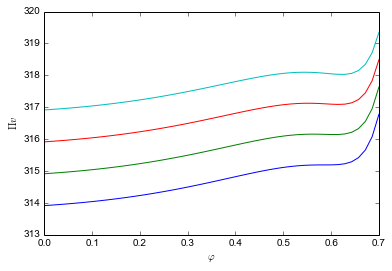

In [6]:
phis = np.linspace(1e-3,0.7)
fs = phase.vf2f(phis)
for piv in pivc + np.arange(4):
    plot(phis, phase.CarnahanStarling().pv(fs, piv, q))
xlabel(r'$\varphi$')
ylabel(r'$\Pi v$')

The respective volume fractions of the maximum and the minimum can be obtained numerically for each $\Pi v$, yielding the spinodal lines.

(0, 1)

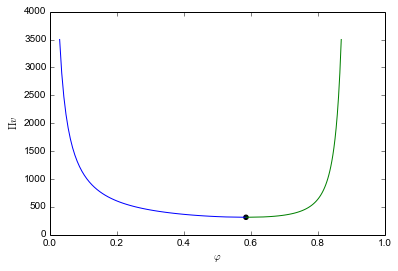

In [7]:
pivs = 1./np.linspace(1./pivc, 1./3500)
sp = phase.CarnahanStarling().spinodalGL(q, pivs)
plot(phase.f2vf(sp[:,1]), sp[:,0])
plot(phase.f2vf(sp[:,2]), sp[:,0])
scatter(phase.f2vf(fc), pivc, c='k')
xlabel(r'$\varphi$')
ylabel(r'$\Pi v$')
xlim(0,1)

On the above graph, the liquid branch is obviously wrong, going far over 0.74. Actually the Carnahan & Starling equation of state has no divergence before $\varphi=1$ so large volume fraction (above 0.56) are unrelyable. However the spinodal curve is a local property of the equation of state and thus the gas branch that stays in dilute regime where Carnahan & Starling is valid is correct.

To confirm this, below superimpose the results from an other equation of state, with a divergence at random close packing. The critical point is shifted to smaller $\varphi$, the liquid branch is very different, but the gas branch is the same.

At critical point colloid volume fraction is 0.516 and osmotic insertion work is 324.219 kT


(0, 1)

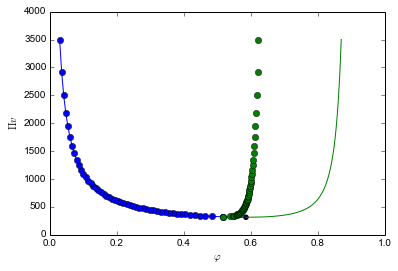

In [8]:
fc2, pivc2 = phase.Liu().critical_point(q)
print 'At critical point colloid volume fraction is %0.3f and osmotic insertion work is %0.3f kT'%(phase.f2vf(fc2), pivc2)
pivs = 1./np.linspace(1./pivc2, 1./3500)
sp2 = phase.Liu().spinodalGL(q, pivs)
plot(phase.f2vf(sp[:,1]), sp[:,0])
plot(phase.f2vf(sp[:,2]), sp[:,0])
plot(phase.f2vf(sp2[:,1]), sp2[:,0], 'ob')
plot(phase.f2vf(sp2[:,2]), sp2[:,0], 'og')
scatter(phase.f2vf(fc), pivc, c='k')
scatter(phase.f2vf(fc2), pivc2, c='y')
xlabel(r'$\varphi$')
ylabel(r'$\Pi v$')
xlim(0,1)

### Phase diagram in experimental space

The osmotic insersion work is *not* an experimentally accessible quantity. However, the osmotic pressure can be expressed by the ideal law $\Pi = n_R/N$ where $n_R$ is the chain element number density in the reservoir.

We can express the chain element number density at overlap $$ n_{ov} = \frac{3N}{4\pi R^3}$$

and we note $y_R=n_R/n_{ov}$, so that we can express the osmotic insersion work into reduced quantities:

$$\Pi v = y_R v \frac{n_{ov}}{N} = y_R \frac{a^3}{R^3} = y_R/q_R^3$$

We can now plot the previous results in terms of reduced number density in the reservoir. By the way, $y_R$ is also the ratio of the polymer mass fractions in the reservoir and at overlap.

(0, 1)

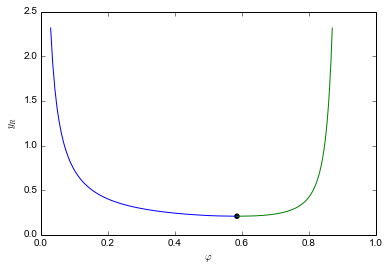

In [9]:
plot(phase.f2vf(sp[:,1]), phase.piv2y(sp[:,0], qR))
plot(phase.f2vf(sp[:,2]), phase.piv2y(sp[:,0], qR))
scatter(phase.f2vf(fc), phase.piv2y(pivc, qR), c='k')
xlabel(r'$\varphi$')
ylabel(r'$y_R$')
xlim(0,1)

At this point we finall confirm that the critical point is below the overlap concentration so the dilute regime approximation is correct in a certain range.

And finally we use our expression of $\alpha(\varphi, q)$ to convert into overall polymer concentrations: $y = n/n_{ov} = \alpha n_R/n_{ov} = \alpha y_R$

(0, 1)

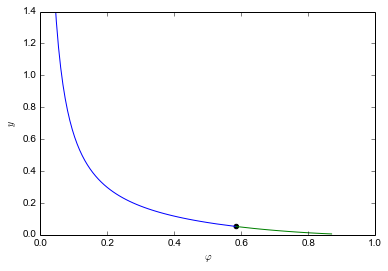

In [10]:
plot(phase.f2vf(sp[:,1]), phase.piv2y(sp[:,0], qR) * phase.alpha(sp[:,1], q))
plot(phase.f2vf(sp[:,2]), phase.piv2y(sp[:,0], qR) * phase.alpha(sp[:,2], q))
scatter(phase.f2vf(fc), phase.piv2y(pivc, qR) * phase.alpha(fc, q), c='k')
xlabel(r'$\varphi$')
ylabel(r'$y$')
ylim(0,1.4)
xlim(0,1)

Using the mass fraction at overlap, we can convert back into overall polymer mass fraction.

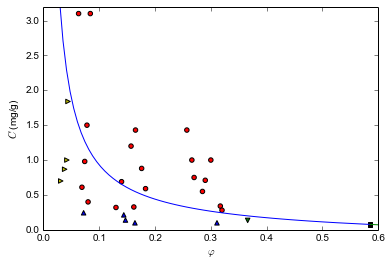

In [11]:
Cov = 1.479 #mg/g
plot(phase.f2vf(sp[:,1]), phase.piv2y(sp[:,0], qR) * phase.alpha(sp[:,1], q) * Cov)
plot(phase.f2vf(sp[:,2]), phase.piv2y(sp[:,0], qR) * phase.alpha(sp[:,2], q) * Cov)
scatter(phase.f2vf(fc), phase.piv2y(pivc, qR) * phase.alpha(fc, q) * Cov, c='k', marker='s')
xlabel(r'$\varphi$')
ylabel(r'$C$ (mg/g)')
ylim(0, 3.2)
xlim(0,0.6)

#experimental points (reservoir cell)
for ph, color,m in [('gel', 'r', 'o'), ('fluid', 'b', '^'), ('transient', 'g', 'v'), ('clusters', 'y', '>')]:
    phi, cp = np.loadtxt('phase_diag_%s.csv'%ph, unpack=True, skiprows=1, usecols=[1,2])
    phi *= 1e-2
    sample = np.loadtxt('phase_diag_%s.csv'%ph, usecols=[0], skiprows=1, dtype='str')
    scatter(phi, cp, c=color, marker=m, label=ph)

### Final idea

In [12]:
1.07**3

1.225043